<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Character Generator Model (Problem 2)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [ ]:
# Import the Required Packages
# Enter your code here:
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.4.0


### GitHub + Colab

In [ ]:
#run for GitHub Colab
!git clone "https://github.com/OldManSteve/DL_Assg2.git"


Cloning into 'DL_Assg2'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 51 (delta 15), reused 42 (delta 9), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [ ]:
#GitHub Colab directory
# Directories for files
holmes_file = '/content/DL_Assg2/holmes.txt'

In [ ]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/DL_Assg2_Models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [ ]:
# read in the text file, transforming everything to lower case
text = open(holmes_file).read().lower()
print('The original text has ' + str(len(text)) + ' characters.\n')

The original text has 562422 characters.



### 1.2 Data Processing


In [ ]:
### print out the first 1000 characters of the raw text to get a sense of what characters to remove
text[:2000]

"\ufeffthe adventures of sherlock holmes by sir arthur conan doyle\n\n   i. a scandal in bohemia\n  ii. the red-headed league\n iii. a case of identity\n  iv. the boscombe valley mystery\n   v. the five orange pips\n  vi. the man with the twisted lip\n vii. the adventure of the blue carbuncle\nviii. the adventure of the speckled band\n  ix. the adventure of the engineer's thumb\n   x. the adventure of the noble bachelor\n  xi. the adventure of the beryl coronet\n xii. the adventure of the copper beeches\n\n\nadventure i. a scandal in bohemia\n\ni.\n\nto sherlock holmes she is always the woman. i have seldom heard\nhim mention her under any other name. in his eyes she eclipses\nand predominates the whole of her sex. it was not that he felt\nany emotion akin to love for irene adler. all emotions, and that\none particularly, were abhorrent to his cold, precise but\nadmirably balanced mind. he was, i take it, the most perfect\nreasoning and observing machine that the world has seen, but as

In [ ]:
# remove all '\n' and '\r' from text
text = text.replace('\n','') 
text = text.replace('\r','')

print(text[:2000])

﻿the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the speckled band  ix. the adventure of the engineer's thumb   x. the adventure of the noble bachelor  xi. the adventure of the beryl coronet xii. the adventure of the copper beechesadventure i. a scandal in bohemiai.to sherlock holmes she is always the woman. i have seldom heardhim mention her under any other name. in his eyes she eclipsesand predominates the whole of her sex. it was not that he feltany emotion akin to love for irene adler. all emotions, and thatone particularly, were abhorrent to his cold, precise butadmirably balanced mind. he was, i take it, the most perfectreasoning and observing machine that the world has seen, but as alover he would have placed himself in a false position. 

In [ ]:
# create a function 'clean_text' to clean text so that only the following letters and punctation remain
def clean_text(text):
    punctuation = ['!', ',', '.', ':', ';', '?', '-', "'",' ']
    letters='abcdefghijklmnopqrstuvwxyz'
    
    # Enter your code here:
    clean_text=''

    for i in text:
      if i in punctuation or i in letters:
        clean_text+=i

    return clean_text

In [ ]:
# clean data using clean_text function
text = clean_text(text)
text[:2000]

"the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the speckled band  ix. the adventure of the engineer's thumb   x. the adventure of the noble bachelor  xi. the adventure of the beryl coronet xii. the adventure of the copper beechesadventure i. a scandal in bohemiai.to sherlock holmes she is always the woman. i have seldom heardhim mention her under any other name. in his eyes she eclipsesand predominates the whole of her sex. it was not that he feltany emotion akin to love for irene adler. all emotions, and thatone particularly, were abhorrent to his cold, precise butadmirably balanced mind. he was, i take it, the most perfectreasoning and observing machine that the world has seen, but as alover he would have placed himself in a false position. 

In [ ]:
# count the number of unique characters in the text
chars = sorted(list(set(text)))

# print some of the text, as well as statistics
print ("This document has " +  str(len(text)) + " total number of characters.")
print ("This document has " +  str(len(chars)) + " unique characters.")

This document has 544340 total number of characters.
This document has 35 unique characters.


In [ ]:
# create a function 'generate_text_io' to generate text inputs based on window_size and the corresponding labels
def generate_text_io(text, window_size):
    inputs = [] # store inputs
    labels = [] # stores label
    
    # Enter your code here:
    for i in range(0, len(text)-window_size):
      inputs.append(text[i:i+window_size])
      labels.append(text[i+window_size])
    
    print("Num of Sequences: ",len(inputs))
    print(inputs)
    return inputs, labels

In [ ]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [ ]:
import numpy as np

# create a function 'encode_io_pairs' to perform one-hot encoding of inputs and labels
def encode_io_pairs(text,window_size): # window_size determines # of characters in each input
    
    # Enter your code here:
    inputs, labels = generate_text_io(text, window_size)


    # Next, one-hot encode the characters into binary arrays.
    print('Vectorization...')
    x = np.zeros((len(inputs), window_size, len(chars)), dtype=np.bool)
    y = np.zeros((len(inputs), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            x[i, t, chars_to_indices[char]] = 1
        y[i, chars_to_indices[labels[i]]] = 1

    return x, y

In [ ]:
# perform one-hot encoding of inputs and labels
window_size = 100
X, y = encode_io_pairs(text, window_size)

Num of Sequences:  544240


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 1.3 Splitting Dataset into Inputs (X) and Labels (y)

In [ ]:
# Note: You may choose to perform this step before encoding the data (step 1.2).
# Enter your code here:
print (y.shape)
print (X.shape)

(544240, 35)
(544240, 100, 35)


## Step 2 – Develop a Character Generator Model

### Model #1 (LSTM)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               83968     
_________________________________________________________________
dense (Dense)                (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=15,
                    batch_size=128) 

Epoch 1/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.7489 - acc: 0.4853
Epoch 2/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.5314 - acc: 0.5466
Epoch 3/15
4252/4252 [==============================] - 103s 24ms/step - loss: 1.4809 - acc: 0.5598
Epoch 4/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.4549 - acc: 0.5672
Epoch 5/15
4252/4252 [==============================] - 105s 25ms/step - loss: 1.4369 - acc: 0.5714
Epoch 6/15
4252/4252 [==============================] - 105s 25ms/step - loss: 1.4230 - acc: 0.5754
Epoch 7/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.4128 - acc: 0.5785
Epoch 8/15
4252/4252 [==============================] - 104s 25ms/step - loss: 1.4052 - acc: 0.5802
Epoch 9/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.3983 - acc: 0.5824
Epoch 10/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.3928 - acc: 0.5839

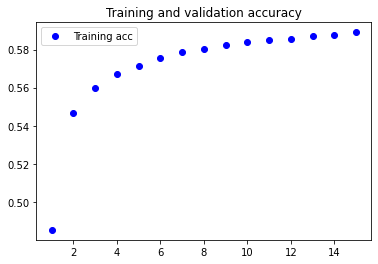

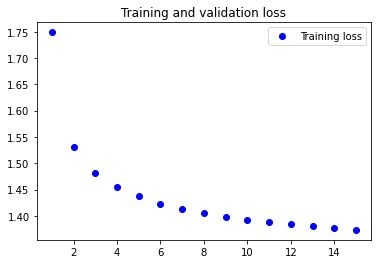

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_2.h5')
model.save('chgen_model_2.h5')

#### Evaluation [chgen_model_1]

In [ ]:
from tensorflow.keras import models

#model.load_weights('chgen_model_best.h5')

model = models.load_model(model_path+'chgen_model_2.h5')

In [ ]:
# takes the user input

#Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.

#text_input = np.array([input()])
text_input = clean_text(input().lower())

i love going to the park, especially when it is windy or sunny. every satruday i go to the park after buying ice cream.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 5

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  114
['i lov', ' love', 'love ', 'ove g', 've go', 'e goi', ' goin', 'going', 'oing ', 'ing t', 'ng to', 'g to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park,', 'ark, ', 'rk, e', 'k, es', ', esp', ' espe', 'espec', 'speci', 'pecia', 'ecial', 'ciall', 'ially', 'ally ', 'lly w', 'ly wh', 'y whe', ' when', 'when ', 'hen i', 'en it', 'n it ', ' it i', 'it is', 't is ', ' is w', 'is wi', 's win', ' wind', 'windy', 'indy ', 'ndy o', 'dy or', 'y or ', ' or s', 'or su', 'r sun', ' sunn', 'sunny', 'unny.', 'nny. ', 'ny. e', 'y. ev', '. eve', ' ever', 'every', 'very ', 'ery s', 'ry sa', 'y sat', ' satr', 'satru', 'atrud', 'truda', 'ruday', 'uday ', 'day i', 'ay i ', 'y i g', ' i go', 'i go ', ' go t', 'go to', 'o to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park ', 'ark a', 'rk af', 'k aft', ' afte', 'after', 'fter ', 'ter b', 'er bu', 'r buy', ' buyi', 'buyin', 'uying', 'ying ', 'ing i', 'ng ic', 'g ice', ' ic

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1
1/1 [==============================] - 0s 2ms/step - loss: 2.1473 - acc: 0.3947
--- Generating with seed: " to t"
------ temperature: 0.2
 to tWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("lstm_1_input:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 5, 35).
he could to the possible to the stone of the stone and start that her land a great then heard to the stone front of the could before man which was a few her heard to the could to the could before man which offere which was a man which was a stall that her lady and stand a staff the stone and stood and sentention which was a man which was the stone of the stone to the could to the could to the coul
------ temperature: 0.5
 could as madam took he was a man her heard so wearing. then some polsceremond to seen this manwas here. then way street-hand-convinich possible to the done to record to the possible restrade, he was not to me to 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


 becamenestpresside be stuwk her azier's gently
epoch 2
1/1 [==============================] - 0s 2ms/step - loss: 1.7126 - acc: 0.4649
--- Generating with seed: "to th"
------ temperature: 0.2
to the possible to the back to the poster to the could stook that her lady to the could to the could to the could to the passion the could to the stone and seemed to the counted to the possible to the possible to the possible to the possible and seen to the stone was a stall that her heard to the passion the could stoo secretuin which was a stair was a stake the could to the passion the possible to the
------ temperature: 0.5
o the charge pain, and clear of the paper facty, expection dressed the story man the take matteress--then hand off the find to the mad on our from to her last was put that her from to be sepolitic as to company as she had the the promister was the postly then great her last he was neat her lady to the stone which while to the chair, said--the passical. it were seeing which 

In [ ]:
model.fit(X, y, batch_size=128, epochs=1)
temperature = 0.2

text_ls = ["dogs are grea", "please ente", "what a sigh", "edge of the worl", "would you please hurr"]

print('------ temperature:', temperature)
print("Prediction: ")
for i in text_ls:
  sys.stdout.write(i)

  # We generate 400 characters
  # for i in range(400):
  sampled = np.zeros((1, len(i), len(chars)))
  for t, char in enumerate(i):
      sampled[0, t, chars_to_indices[char]] = 1.

  preds = model.predict(sampled, verbose=0)[0]
  next_index = sample(preds, temperature)
  next_char = chars[next_index]

  sys.stdout.write(next_char)
  sys.stdout.flush()
  print()


text_input = input("Enter sentence to predict next character: \n")
print("Predicting user input... \n")
sys.stdout.write(text_input)

sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()

1/1 [==============================] - 0s 2ms/step - loss: 1.0243 - acc: 0.6930
------ temperature: 0.2
Prediction: 
dogs are great
please enter
what a sight
edge of the world
would you please hurry
Enter sentence to predict next character: 
i am so happ
Predicting user input... 

i am so happy


#### Evaluation [chgen_model_1]

In [ ]:
from tensorflow.keras import models

#model.load_weights('chgen_model_best.h5')

model = models.load_model(model_path+'chgen_model_2.h5')

In [ ]:
# takes the user input

#Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.

#text_input = np.array([input()])
text_input = clean_text(input().lower())

Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 10

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  679
["oh's third", "h's third ", "'s third v", 's third vi', ' third vic', 'third vict', 'hird victi', 'ird victim', 'rd victim ', 'd victim w', ' victim wa', 'victim was', 'ictim was ', 'ctim was h', 'tim was ha', 'im was haw', 'm was hawk', ' was hawke', 'was hawker', 'as hawker ', 's hawker s', ' hawker st', 'hawker sta', 'awker stal', 'wker stall', 'ker stall ', 'er stall o', 'r stall ow', ' stall own', 'stall owne', 'tall owner', 'all owner ', 'll owner n', 'l owner ng', ' owner ng ', 'owner ng p', 'wner ng ph', 'ner ng phe', 'er ng phek', 'r ng phek ', ' ng phek h', 'ng phek hu', 'g phek hua', ' phek huay', 'phek huay,', 'hek huay, ', 'ek huay, w', 'k huay, wh', ' huay, who', 'huay, whom', 'uay, whom ', 'ay, whom h', 'y, whom he', ', whom he ', ' whom he s', 'whom he st', 'hom he sto', 'om he stol', 'm he stole', ' he stole ', 'he stole f', 'e stole fr', ' stole fro', 'stole from', 'tole from ', 'ole from o', 'le from on', 'e from on ', ' from on s', 'from on s

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1
6/6 [==============================] - 0s 6ms/step - loss: 1.9633 - acc: 0.4580
--- Generating with seed: "from on se"
------ temperature: 0.2
from on seWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("lstm_1_input:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 10, 35).
arch of the matter to the house, and the corner to the lady of the state of the police that he was a street which he had not come of the other was a street of the traces to the coloured and an anger of the state of the police that the man who was a state of the state of the state of the state of the traces to the state to the coronet which he was a story was a passage of the state of the great one
------ temperature: 0.5
 great one of the state upon him where i was morning and seen to the miss hand so have some traces. he had let the death and the writing, he said, when he had been seen in an alshy he was as her way and

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


r her bobleacracy. i amrrousant wasphoised,' said he.sharpened upon the requine and begon t monthn bloting featurer of you. that against her roade. she had not his permision into the matter.! leoked your hands.  foar weeks. we are anyte fundenfully using at the raid fo
------ temperature: 1.2
he raid for there.there were, concelted anverouty seees brot-empty hat and here, upi reason inturk his own bittensweek, tah! as i wasalreadywrict. 'to open cwebego lasclik that.i know thempforthy refuse twice tappear fromidbebb. which you despairing san him.it with than neitherly permiser-legger putted the daughtic obvious where. halfry, had been awjuccretoor every protme so i het was noting.breittyad uponw
epoch 2
6/6 [==============================] - 0s 7ms/step - loss: 1.5936 - acc: 0.5405
--- Generating with seed: "octor at q"
------ temperature: 0.2
octor at quite and story and seemed to the police to the other was her street. i am a stranger was the state of the time, i have some state when

### Model #2 (GRU)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(256, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(256))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 256)          225024    
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dense (Dense)                (None, 35)                8995      
Total params: 628,771
Trainable params: 628,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

history = model.fit(X, y,
                    epochs=10,
                    batch_size=128) 

Epoch 1/10
4252/4252 [==============================] - 114s 27ms/step - loss: 2.3538 - acc: 0.3219
Epoch 2/10
4252/4252 [==============================] - 115s 27ms/step - loss: 2.0286 - acc: 0.4053
Epoch 3/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.8838 - acc: 0.4456
Epoch 4/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.7878 - acc: 0.4720
Epoch 5/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.7137 - acc: 0.4934
Epoch 6/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.6529 - acc: 0.5113
Epoch 7/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.6018 - acc: 0.5265
Epoch 8/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.5586 - acc: 0.5390
Epoch 9/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.5214 - acc: 0.5499
Epoch 10/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.4895 - acc: 0.5584

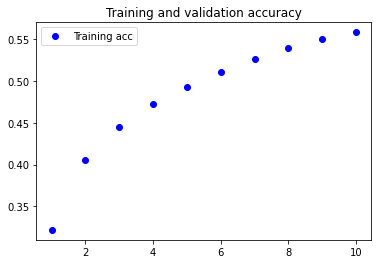

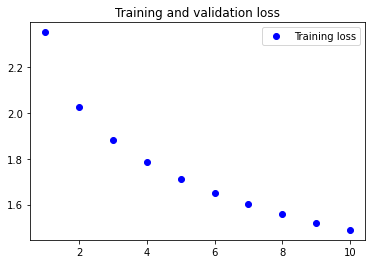

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_10.h5')
model.save('chgen_model_10.h5')

#### Evaluation [chgen_model_2]

In [ ]:
from tensorflow.keras import models

#model.load_weights('chgen_model_best.h5')

model = models.load_model(model_path+'chgen_model_10.h5')

In [ ]:
# takes the user input

#Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.

#text_input = np.array([input()])
text_input = clean_text(input().lower())

i love going to the park, especially when it is windy or sunny. every satruday i go to the park after buying ice cream.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 5

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  114
['i lov', ' love', 'love ', 'ove g', 've go', 'e goi', ' goin', 'going', 'oing ', 'ing t', 'ng to', 'g to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park,', 'ark, ', 'rk, e', 'k, es', ', esp', ' espe', 'espec', 'speci', 'pecia', 'ecial', 'ciall', 'ially', 'ally ', 'lly w', 'ly wh', 'y whe', ' when', 'when ', 'hen i', 'en it', 'n it ', ' it i', 'it is', 't is ', ' is w', 'is wi', 's win', ' wind', 'windy', 'indy ', 'ndy o', 'dy or', 'y or ', ' or s', 'or su', 'r sun', ' sunn', 'sunny', 'unny.', 'nny. ', 'ny. e', 'y. ev', '. eve', ' ever', 'every', 'very ', 'ery s', 'ry sa', 'y sat', ' satr', 'satru', 'atrud', 'truda', 'ruday', 'uday ', 'day i', 'ay i ', 'y i g', ' i go', 'i go ', ' go t', 'go to', 'o to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park ', 'ark a', 'rk af', 'k aft', ' afte', 'after', 'fter ', 'ter b', 'er bu', 'r buy', ' buyi', 'buyin', 'uying', 'ying ', 'ing i', 'ng ic', 'g ice', ' ic

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1
1/1 [==============================] - 0s 5ms/step - loss: 1.9859 - acc: 0.4298
--- Generating with seed: ", esp"
------ temperature: 0.2
, espWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("gru_input:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 5, 35).
er, and that have you stated in that have you shall down which had starry, but the diston, which what sent comparringg the down with the leave courtth. i fellow, and that heavely. it was all porrougghed that she was hand which stair should beforr wand that heave in that her was the man stair note was all to there was she was stepper, and the seemen, what she was all the door which stair should dow
------ temperature: 0.5
d down keepence, that sen that wher father camp the was wand seemed. the sompleine from have light heard off untill dest from and that paper day inter windo have leavely. which leaven, i have me to there, down from i

In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_ls = ["dogs are grea", "please ente", "what a sigh", "edge of the worl", "would you please hurr"]
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
for i in text_ls:
  sys.stdout.write(i)

  # We generate 400 characters
  # for i in range(400):
  sampled = np.zeros((1, len(i), len(chars)))
  for t, char in enumerate(i):
      sampled[0, t, chars_to_indices[char]] = 1.

  preds = model.predict(sampled, verbose=0)[0]
  next_index = sample(preds, temperature)
  next_char = chars[next_index]

  sys.stdout.write(next_char)
  sys.stdout.flush()
  print()


text_input = input("Enter sentence to predict next character: \n")
print("Predicting user input... \n")
sys.stdout.write(text_input)

# We generate 400 characters
# for i in range(400):
sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()

1/1 [==============================] - 0s 4ms/step - loss: 1.9773 - acc: 0.4474
------ temperature: 0.2
Prediction: 
dogs are great
please enter
what a sight
edge of the world
would you please hurri
Enter sentence to predict next character: 
i am so happ
Predicting user input... 

i am so happy


#### Evaluation [chgen_model_2]

In [ ]:
from tensorflow.keras import models


#model.load_weights('chgen_model_best.h5')
model = models.load_model(model_path+'chgen_model_10.h5')

In [ ]:
# takes the user input

#text_input = np.array([input()])
text_input = clean_text(input().lower())

Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 10

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  679
["oh's third", "h's third ", "'s third v", 's third vi', ' third vic', 'third vict', 'hird victi', 'ird victim', 'rd victim ', 'd victim w', ' victim wa', 'victim was', 'ictim was ', 'ctim was h', 'tim was ha', 'im was haw', 'm was hawk', ' was hawke', 'was hawker', 'as hawker ', 's hawker s', ' hawker st', 'hawker sta', 'awker stal', 'wker stall', 'ker stall ', 'er stall o', 'r stall ow', ' stall own', 'stall owne', 'tall owner', 'all owner ', 'll owner n', 'l owner ng', ' owner ng ', 'owner ng p', 'wner ng ph', 'ner ng phe', 'er ng phek', 'r ng phek ', ' ng phek h', 'ng phek hu', 'g phek hua', ' phek huay', 'phek huay,', 'hek huay, ', 'ek huay, w', 'k huay, wh', ' huay, who', 'huay, whom', 'uay, whom ', 'ay, whom h', 'y, whom he', ', whom he ', ' whom he s', 'whom he st', 'hom he sto', 'om he stol', 'm he stole', ' he stole ', 'he stole f', 'e stole fr', ' stole fro', 'stole from', 'tole from ', 'ole from o', 'le from on', 'e from on ', ' from on s', 'from on s

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1
6/6 [==============================] - 0s 7ms/step - loss: 2.0153 - acc: 0.4404
--- Generating with seed: "am ng took"
------ temperature: 0.2
am ng tookWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("gru_input_1:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 10, 35).
 a start and the street of the street of the secret the companion of the strange and have been street of the state and the dear from the coroner to me that he was a shall of the secret the street and the dear which i have been street. i have not be a little the lady with his face and the from the companion which he see that i am some of the strange of the coroner was a sure that was the concent a 
------ temperature: 0.5
concent a put upon the componition as the face and the gland. left he had been at the back so the fire at the did at the pater of the police we shall double and was done that he has had been as he was a 

## Step 3 – Use the Best Model to make prediction

In [ ]:
from tensorflow.keras import models
model = models.load_model(model_path+'chgen_model_2.h5')
model.save(model_path+'chgen_model_best.h5')

In [ ]:

model = models.load_model(model_path+ 'chgen_model_best.h5')

In [ ]:
# takes the user input

#text_input = np.array([input()])
text_input = clean_text(input().lower())

Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 10

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  679
["oh's third", "h's third ", "'s third v", 's third vi', ' third vic', 'third vict', 'hird victi', 'ird victim', 'rd victim ', 'd victim w', ' victim wa', 'victim was', 'ictim was ', 'ctim was h', 'tim was ha', 'im was haw', 'm was hawk', ' was hawke', 'was hawker', 'as hawker ', 's hawker s', ' hawker st', 'hawker sta', 'awker stal', 'wker stall', 'ker stall ', 'er stall o', 'r stall ow', ' stall own', 'stall owne', 'tall owner', 'all owner ', 'll owner n', 'l owner ng', ' owner ng ', 'owner ng p', 'wner ng ph', 'ner ng phe', 'er ng phek', 'r ng phek ', ' ng phek h', 'ng phek hu', 'g phek hua', ' phek huay', 'phek huay,', 'hek huay, ', 'ek huay, w', 'k huay, wh', ' huay, who', 'huay, whom', 'uay, whom ', 'ay, whom h', 'y, whom he', ', whom he ', ' whom he s', 'whom he st', 'hom he sto', 'om he stol', 'm he stole', ' he stole ', 'he stole f', 'e stole fr', ' stole fro', 'stole from', 'tole from ', 'ole from o', 'le from on', 'e from on ', ' from on s', 'from on s

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=0.2):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  
#sequences = tokenizer.texts_to_sequences(text_input)
#data = pad_sequences(sequences, maxlen=max_len)

print("Temperature: ", temperature)
for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - window_size - 1)
    generated_text = text_input[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    #for temperature in [0.2, 0.5, 1.0, 1.2]:
        #print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 100 characters
    for i in range(100):
        sampled = np.zeros((1, window_size, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, chars_to_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


Temperature:  1.2
epoch 1
6/6 [==============================] - 0s 6ms/step - loss: 1.9631 - acc: 0.4610
--- Generating with seed: "hat she had to take it before her medical check-up.  thinking that oh was one of the polyclinic staf"
hat she had to take it before her medical check-up.  thinking that oh was one of the polyclinic stafss woman to lefoutligicy, foundnessly. the name, funce. thenit is loss you.indeocy. yet his bedroom.
epoch 2
6/6 [==============================] - 0s 7ms/step - loss: 1.5886 - acc: 0.5376
--- Generating with seed: " , was waiting for her turn to see the doctor at queenstown polyclinic, he stole money from her hand"
 , was waiting for her turn to see the doctor at queenstown polyclinic, he stole money from her hand. youdod once kneechpart to turn thisfus injusplyand talk, glated lauring me whise halfler's last of
epoch 3
6/6 [==============================] - 0s 6ms/step - loss: 1.3613 - acc: 0.6053
--- Generating with seed: "e it before her medical check-u

In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_input = input("Enter sentence to predict next character: \n")
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
sys.stdout.write(text_input)


sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()

6/6 [==============================] - 0s 6ms/step - loss: 0.9041 - acc: 0.7452
Enter sentence to predict next character: 
dogs are grea
------ temperature: 0.2
Prediction: 
dogs are great
